# 5. 차원 축소를 사용한 데이터 압축

차원 축소를 위한 특성 선택의 또 다른 방식은 특성 추출(feature extraction)이다  
이 장에서는 데이터셋의 정보를 요약하는 세 가지 기본적인 기술을 배울 것이다  
이들은 원본 데이터셋을 좀 더 낮은 차원의 새로운 특성 부분 공간으로 변환한다  

* 주성분 분석(Principal Component Analysis, PCA)을 사용한 비지도(unsupervised) 데이터 압축하기
* 지도(supervised) 방식의 차원 축소 기법인 선형 판별 분석(Linear Discriminant Analysis, LDA)을 이용하여 클래스 구별 능력 최대화하기
* 커널 PCA(kernel Principal Component Analysis, KPCA)를 사용한 비선형 차원 축소하기  

## 5.1 주성분 분석을 통한 비지도 차원 축소

특성 선택과 특성 추출의 차이는 원본 특성을 유지하느냐에 있다  
순차 후진 선택같은 특성 선택 알고리즘을 사용할 때는 원본 특성을 유지하지만 특성 추출은 새로운 특성 공간으로 데이터를 변환하거나 투영한다  
차원 축소 관점에서 보면 특성 추출은 대부분의 관련있는 정보를 유지하면서 데이터를 압축하는 방법으로 이해할 수 있다  
특성 추출이 저장 공간을 절약하거나 학습 알고리즘의 계산 효율성을 향상할 뿐만 아니라 차원의 저주 문제를 감소시켜 예측 성능을 향상하기도 한다  

### 5.1.1 주성분 분석의 주요 단계

PCA는 특성 사이의 상관관계를 기반으로 하여 데이터에 있는 특성을 잡아낼 수 있다  
PCA는 고차원 데이터에서 분산이 가장 큰 방향을 찾고 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분 공간으로 이를 투영합니다  
새로운 부분 공간의 직교 좌표는 주오진 조건하에서 분산이 최대인 방향으로 해석할 수 있다  
<img src='https://blog.kakaocdn.net/dn/bHVVHh/btqBVgfijCd/Kkkehx2uyeKtFpSdQAOjz1/img.png'>
$x_{1}$과 $x_{2}$는 원본 특성 축이고 PC1과 PC2는 주성분이다  

PCA를 사용하여 차원을 축소하기 위해 $d$x$k$차원의 변환 행렬 $W$를 만든다  
이 행렬로 샘플 벡터 $x$를 새로운 $k$차원의 특성 부분 공간으로 매핑한다  
이 부분 공간은 원본 $d$차원의 특성 공간보다 작은 차원을 갖는다  
$$
x = \left[x_{1},x_{2},\cdots,x_{d}\right], x\in\mathbb{R}^{d}\\
\downarrow xW, W\in\mathbb{R}^{d\times k}\\
z=\left[z_{1},z_{2},\cdots,z_{k}\right], z\in \mathbb{R}^{k}
$$
원본 $d$ 차원 데이터를 새로운 $k$ 차원의 부분 공간으로 변환하여 만들어진 첫 번째 주성분이 가장 큰 분산을 가진다  
모든 주성분들과 상관관계가 없다는 제약하에 가장 큰 분산을 가진다  
입력 특성에 상관관계가 있더라도 만들어진 주성분은 서로 직각을 이룰것이다  
PCA방향은 데이터 스케일에 매우 민감하다  
특성의 스케일이 다르고 모든 특성의 중요도를 동일하게 취급하려면 PCA를 적용하기 전에 특성을 표준화 전처리해야한다  

차원 축소를 위한PCA 알고리즘을 자세히 알아보기 전에 사용할 방법을 몇 단계로 나누어 정리하면
1. $d$차원 데이터셋을 표준화 전처리한다  
2. 공분산 행렬을 만든다  
3. 공분산 행렬을 고유 벡터와 고윳값으로 분해한다  
4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매긴다  
5. 고윳값이 가장 큰 $k$개의 고유 벡터를 선택한다. 여기서 $k$는 새로운 특성 부분 공간의 차원이다($k\leq d$)  
6. 최상위 $k$개의 고유 벡터로 투영 행렬 $W$를 만든다  
7. 투영 행렬 $W$를 사용해서 $d$ 차원 입력 데이터셋 $X$를 새로운 $k$ 차원의 특성 부분 공간으로 변환한다  

### 5.1.2 주성분 추출 단계

이 절에서 PCA 처음 네 단계를 처리한다  
1. 데이터를 표준화 전처리한다  
2. 공분산 행렬을 구성한다  
3. 공분산 행렬의 고윳값과 고유 벡터를 구한다  
4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매긴다  

Wine 데이터셋 로드

In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                       header=None)

Wine 데이터셋을 70%와 30% 비율로 훈련 세트와 테스트 세트로 나누고 표준화를 적용하여 단위 분산을 갖도록 한다

In [2]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)
# 특성을 표준화 전처리한다  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

앞 코드를 실행하여 필수적인 전처리 단계를 완료한 후 공분산 행렬을 만드느 두 번째 단계를 진행한다  
공분산 $d \times d$차원의 대칭 행렬로 특성 상호간의 공분산을 저장한다  
$d$는 데이터셋에 있는 차원 개수입니다  
예를 들어 전체 샘플에 대한 두 특성 $x_{j}$와 $x_{k}$ 사이의 공분산은 다음 식으로 계산 할 수 있다  
$$
\sigma_{jk} = \frac{1}{n}\sum^{n}_{i=1}\left(x_{j}^{\left(i\right)} - \mu_{j}\right)\left(x_{k}^{\left(i\right)} - \mu_{k}\right)
$$
여기서 $\mu_{j}$와 $\mu_{k}$는 특성 $j$와 $k$의 샘플 평균이다  
데이터셋을 표준화 전처리했기 때문에 샘플 평균은 0이다  
두 특성 간 양의 공분산은 특성이 함께 증가하거나 감소하는 것을 나타낸다  
반면 음의 공분산은 특성이 반대 방향으로 달라진다는 것을 나타낸다  
예를 들어 세 개의 특성으로 이루어진 공분산 행렬은 다음과 같이 쓸 수 있다  
$$
\sum = \begin{bmatrix}
\sigma_{1}^{2} & \sigma_{12} & \sigma_{13}\\ 
\sigma_{21} & \sigma_{2}^{2} & \sigma_{23}\\ 
\sigma_{31} & \sigma_{32} & \sigma_{3}^{2}
\end{bmatrix}
$$
공분산 행렬의 고유 벡터가 주성분(최대 분산의 방향)을 표현합니다  
이에 대응되는 고윳값은 주성분의 크기이다  
Wine 데이터셋의 경우 13 X 13 차원의 공분산 행렬로부터 13개의 소유 벡터와 고윳값을 얻을 수 있다  

이제 세 번째 단계를 위해 공분사의 행렬의 고유 벡터와 고윳값의 쌍을 구해보자  
고유 벡터 $v$는 다음 식을 만족한다  
$$
\sum v = \lambda v
$$
여기서 $\lambda$는 스케일을 담당하는 고윳값이다  
고윳값과 벡터를 직접 게산하는 것은 복잡하기 때문에 numpy의 linalg.eig 함수를 사용하여 Wine 데이터셋의 공분산 행렬에 대한 고유 벡터와 고윳값 쌍을 계산한다  


In [3]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n고윳값 \n%s' % eigen_vals)


고윳값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


### 5.1.3 총분산과 설명된 분산

데이터셋 차원을 새로운 특성 부분 공간으로 압축하여 줄여야 하기에 가장 많은 정보를 가진 고유벡터(주성분) 일부만 선택한다  
고윳값은 고유 벡터의 크기를 결정하므로 고윳값을 내림차순으로 정렬한다  
고윳값 순서에 따라 최상위 $k$개의 고유 벡터를 선택한다  
가장 정보가 많은 $k$개의 고유 벡터를 선택하기 전에 고윳값의 설명된 분산 비율을 그래프로 그려보자  
고윳값 $\lambda_{j}$의 설명된 분산의 전체 비율은 전체 고윳값의 합에서 고윳값 $\lambda_{j}$의 비율이다  
$$
\frac{\lambda_{j}}{{\sum}^{d}_{j=1}\lambda_{j}}
$$
넘파이 sumsum 함수로 설명된 분산의 누적 합을 계산하고 맷플롯립의 step 함수로 그래프를 그려보자  

In [4]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
           sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 1 Axes>

PCA는 비지도학습으로 클래스 레이블에 관한 정보는 사용하지 않았다  
랜덤 포레스트는 클래스 소속 정보를 사용하여 노드의 불순도를 계산하는 반면 분산은 특성 축을 따라 값들이 퍼진 정도를 측정한다  

### 5.1.4 특성 변환

공분산 행렬을 고유 벡터와 고윳값 쌍으로 성공적으로 분해한 후 Wine 데이터셋을 새로운 주성분 축으로 변환하는 나머지 세 단계를 진행해 보자  
* 고윳값이 가장 큰 $k$개의 고유 벡터를 선택한다. 여기서 $k$는 새로운 특성 부분 공간의 차원이다($k\leq d$)
* 최상위 $k$개의 고유 벡터로 투영 행렬 $W$를 만든다  
* 투영 행렬 $W$를 사용해서 $d$차원 입력 데이터셋 $X$를 새로운 $k$ 차원의 특성 부분 공간으로 변환한다  

좀 더 쉽게 설명하면 고윳값의 내림차순으로 고유 벡터를 정렬하고 선택된 고유 벡터로 투영행렬을 구성한다  
이 투영 행렬을 사용하여 데이터를 저차원 부분 공간으로 변환한다  

먼저 고유값의 내림차순으로 고유 벡터와 고윳값의 쌍을 정렬한다  

In [5]:
# (고윳값, 고유 벡터) 퓨틀의 리스트를 만든다
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
# 높은 값에서 낮은 값으로 (고윳값, 고유 벡터) 튜플을 정렬한다  
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

다음 가장 큰 두개의 고윳값에 해당하는 고유 벡터를 선택한다  
이 데이터셋에 있는 분산의 약 60%를 잡아낼 수 있을 것이다  
이 예제에서는 나중에 2차원 산점도를 그리기 위해 두 개의 고유 벡터만 선택했다  
실전에서는 계산 효율성과 모델 성능 사이의 절충점을 찾아 주성분 개수를 결정해야 한다  

In [6]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W:\n', w)

투영 행렬 W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


투영 행렬을 사용하면 샘플 $x$(1X13 차원의 행 벡터)를 PCA 부분 공간(두 개의 주성분)을 투영하여 $x'$를 얻을 수 있다  
두 개의 특성으로 구성된 2차원 샘플 벡터이다  
$$
x'=xW
$$

In [7]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

비슷하게 전체 124 X 13 차원의 훈련 데이터셋을 행렬 점곱으로 두 개의 주성분으로 변환할 수 있다  
$$
X'=XW
$$

In [8]:
X_train_pca = X_train_std.dot(w)

마지막으로 124 X 2 차원의 행렬로 변환된 Wine훈련 세트를 2차원 산점도로 시각화 해보자  

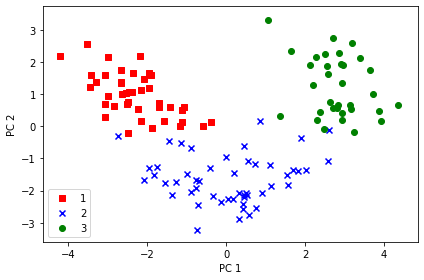

In [9]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

데이터가 y축보다 x축을 따라 더 넓게 퍼져있다  
주성분의 고윳값 크기로 정려라기 때문에 첫 번째 주성분이 가장 큰 분산을 갖는다  
선형 분류기가 클래스들을 잘  분리할 수 있을 것 같다고 직관적으로 알 수 있다  

### 5.1.5 사이킷런의 주성분 분석

PCA클래스는 사이킷런의 변환기 클래스 중 하나다  
훈련 데이터를 사용하여 모델을 훈련하고 같은 모델 파라미터를 사용하여 훈련 데이터와 테스트 데이터를 변환한다  


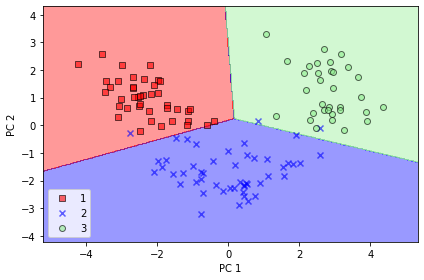

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #마커와 컬러맵을 준비한다 
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #클래스 샘플을 표시합니다  
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap.colors[idx],
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)
        
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

사이킷런의 PCA투영과 직접 구현한 PCA를 비교하면 두 그래프는 거울에 비친 것처럼 뒤집혀 있다  
두 그래프중 하나에 문제가 있는게 아니라 계산 방법에 따라 고유벡터는 음수나 양수의 부호를 가질 수 있기 때문이다  
이것이 문제가 되진 않지만 필요하다면 데이터에 -1을 곱해서 이미지를 뒤집을 수 있다  
고유 벡터는 일반적으로 단위 길이가 1이 되도록 정규화되어 있다

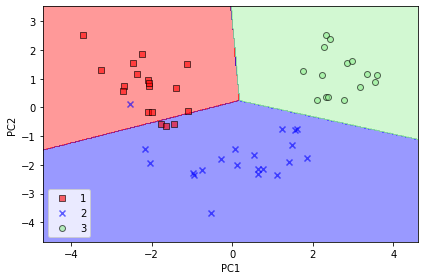

In [11]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

이 코드를 실행하여 테스트 세트에서 결정 경계를 그리고 나면 로지스틱 회귀가 2차원 특성 부분 공간에서 매우 잘 작동한다는 것을 알 수 있다  
전체 주성분의 설명된 분산 비율을 알고 싶다면 n_components 매개변수를 None으로 지정하고 PCA 클래스의 객체를 만들면 된다  

In [12]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

## 5.2 선형 판별 분석을 통한 지도 방식의 데이터 압축

선형 판별 분석은 규제가 없는 모델에서 차원의 저주로 인한 과대 적합 정도를 줄이고 계산 효율성을 높이기 위한 특성 추출의 기법으로 사용할 수 있다  
PCA가 데이터셋에 있는 분산이 최대인 직교 성분 축을 찾으려고 하는 반면, LDA 목표는 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾는 것이다  

### 5.2.1 주성분 분석 vs 선형 판별 분석

PCA와 LDA 모두 데이터셋의 차원의 개수를 줄일 수 있는 선형 변환 기법이다  
전자는 비지도 학습 알고리즘이지만 후자는 지도 학습 알고리즘이다  
직관적으로 LDA가 PCA보다 분류작업에서 더 뛰어난 특성 추출 기법으로 생각할 수 있다  
<img src='https://blog.kakaocdn.net/dn/KBzIt/btqBSPDcgpC/0UfKfcnNIQytJLsN7bN2e0/img.png'>  
x축으로 투영하는 선형 판별 벡터는 두 개의 정규 분포 클래스를 잘 구분한다  
y축으로 투영하는 선형 판별 벡터는 데이터셋에 있는 분산을 많이 잡아내지만 클래스 판별 정보가 없기 때문에 좋은 선형 판별 벡터가 되지 못한다  
LDA는 데이터가 정규 분포라고 가정한다  
또 클래스가 동일한 공분산 행렬을 가지고 샘플은 서로 통계적으로 독립적이라고 가정한다  
하나 이상의 가정이(조금)위반되더라도 여전히 LDA는 차원 축소를 상당히 잘 수행한다  

### 5.2.2 선형 판별 분석의 내부 동작 방식

LDA 수행에 필요한 주요 단계를 요약해보면
1. $d$차원의 데이터셋을 표준화 전처리한다($d$는 특성 개수)
2. 각 클래스에 대해 $d$차원의 평균 벡터를 계산한다  
3. 클래스 간의 산포 행렬 $S_{B}$와 클래스 내 산포 행렬 $S_{W}$를 구성한다  
4. $S_{W}^{-1}S_{B}$행렬의 고유 벡터와 고윳값을 계산한다  
5. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순서를 매긴다  
6. 고윳값의 가장 큰 $k$개의 고유 벡터를 선택하여 $d\times k$차원의 변환 행렬 $W$를 구성한다. 이 행렬의 열이 고유 벡터이다  
7. 변환 행렬 $W$를 사용하여 샘플을 새로운 특성 부분 공간으로 투영한다  

LDA는 단계 2에서 계산하는 평균 벡터를 만드는 데 클래스 레이블 정보를 사용한다  
클래스 레이블별로 데이터를 나누어 평균을 구한다  

### 5.2.3 산포 행렬 계산

평균 벡터를 사용하여 클래스 간의 산포 행렬과 클래스 내 산포 행렬과 클래스 내 산포 행렬을 구성한다  
평균 벡터 $m_{i}$는 클래스 $i$의 샘플에 대한 특성의 평균값 $\mu_{m}$을 저장한다  
$$
m_{i}=\frac{1}{n}\sum^{c}_{x\in D_{i}}x_{m}
$$
세 개의 평균 벡터가 만들어진다  
$$
m_{i} = \begin{bmatrix}
\mu_{i,alcohol} \\ 
\mu_{i,malic acid}\\ 
\vdots \\
\mu_{i,proline}
\end{bmatrix}\ i\in\left\{1,2,3\right\}
$$

In [14]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(
                     X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



평균 벡터를 사용하여 클래스 내 산포 행렬 $S_{W}$를 계산할 수 있다  
$$
S_{i} = \sum^{c}_{x\in 1}S_{i}
$$
이 행렬은 개별 클래스 $i$의 산포 행렬 $S_{i}$를 더하여 구한다  
$$
S_{i} = \sum^{c}_{x\in D_{i}} \left(x - m_{i]\right)\left(x - m_{i}\right)^{T}
$$